# BREAST CANCER DATASET: 

**I am going to work with a breast cancer dataset in order to predict the if the given cancer cell is Benign (Not harmful) or Malignant (Harmful).
I would compare different clustering and classification techniques in order to see which one is better so as to attain the highest possible accuracy for my prediction**

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Loading the datasets

data = pd.read_csv('C:/breastcancer.csv')

In [3]:
#To read and check the dataset

data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Now from this dataset above, i can see the column "Diagnosis". This is going to be my focus for my prediction because it is the diagnosis of the breast cancer cell that would determine if it is harmful or not.** 

In [4]:
#Dropping unneeded columns

cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)

In [5]:
data.head() #To confirm if the columns dropped.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# EXPLORATORY DATA ANALYSIS: 

Before going ahead with the clustering techniques, i will explore different visualizaton plots in order to get some statistics about the datasets

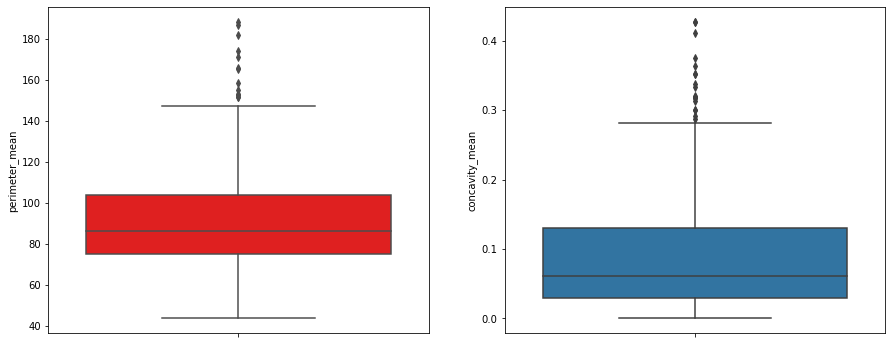

In [6]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["perimeter_mean"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["concavity_mean"])
plt.show()

Now, i am going to visualize a plot to compare the distribution of the worst fractal dimension and worst symmetry in the dataset:

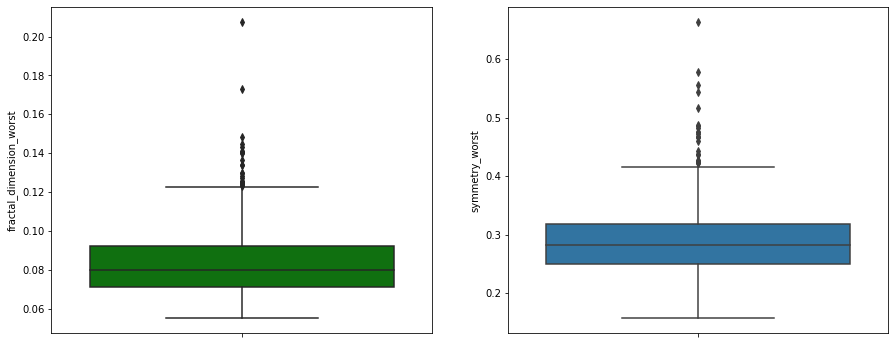

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["fractal_dimension_worst"], color="green")
plt.subplot(1,2,2)
sns.boxplot(y=data["symmetry_worst"])
plt.show()

**Now, i am going to bring the diagnosis data to work out my prediction.**



In [8]:

data['diagnonis'] = data['diagnosis'].map({'M':1,'B':0})

# Featureset creation
X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)

**Now, i will set the number of clusters. I can directly set the number to be 2 since i am only predicting two things. But i will still go ahead to carry out the Elbow method below:**

In [9]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(data[['fractal_dimension_worst','symmetry_worst']])
    sse.append(km.inertia_)

In [10]:
sse

[2.359354377284358,
 1.1247571073623706,
 0.6164092283226309,
 0.44288402856733033,
 0.3448747211261681,
 0.2882308101671366,
 0.23991022943733192,
 0.21263518638123002,
 0.19187836296377725]

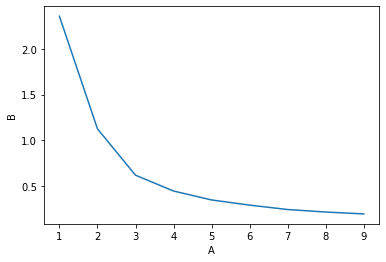

In [11]:
plt.xlabel('A')
plt.ylabel('B')
plt.plot(range(1,10),sse)

# K-MEANS CLUSTERING

**Now moving on, I would go ahead with my number of clusters being **2**

In [12]:
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
km_pred = km.fit_predict(X)

# Now, I will display the original clusters side-by-side with the K-Means Clustering which i have just performed:

Text(0.5, 1.0, 'kmeans clustering plot')

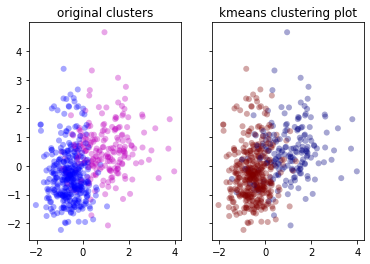

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="none", alpha=0.35)
ax1.set_title("original clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("kmeans clustering plot")

**Observing these two clusters above, i can see that my kmeans clustering technnique is almost accurate to some extent. 
However, i  would check its precision and accuracy to be sure** 
Since i can not directly check the accuracy of the 'diagnosis' because its values are strings, i would make it 1's & 0's then assign it to the predicted label 'Clusters'. 

In [14]:
def converter(cluster):
    if cluster=='M':
        return 1
    else:
        return 0
data['Clusters'] = data['diagnosis'].apply(converter)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnonis,Clusters
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1


In [15]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Clusters'],km.labels_))
print(classification_report(data['Clusters'],km.labels_))

[[  7 350]
 [179  33]]
              precision    recall  f1-score   support

           0       0.04      0.02      0.03       357
           1       0.09      0.16      0.11       212

    accuracy                           0.07       569
   macro avg       0.06      0.09      0.07       569
weighted avg       0.06      0.07      0.06       569



**So now, i can see that the k-means clustering is good but i will still go ahead to compare it with other clustering techniques**

# Hierarchical Agglomerative Clustering 

In [16]:
#Importing 

from sklearn.cluster import AgglomerativeClustering

Text(0.5, 1.0, 'agglomeratve clustering plot')

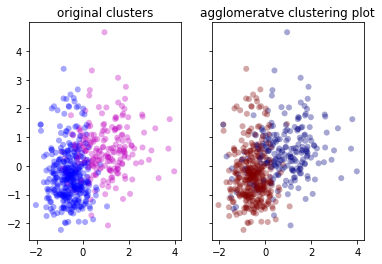

In [17]:
#Choosing number of clusters and plotting scattered plots for original and agg. clustering

ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="none", alpha=0.35)
ax1.set_title("original clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("agglomeratve clustering plot")

In [18]:
 ac_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [19]:
data['Aggl_pred'] =  ac_pred

In [20]:
def converter(cluster):
    if cluster== 1:
        return 0
    else:
        return 1
data['Aggl_pred'] = data['Aggl_pred'].apply(converter)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnonis,Clusters,Aggl_pred
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,1,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1,1


In [21]:
def converter(cluster):
    if cluster=='B':
        return 1
    else:
        return 0
data['Clusters'] = data['diagnosis'].apply(converter)

In [22]:
print(confusion_matrix(data['Clusters'],ac.labels_))
print(classification_report(data['Clusters'],ac.labels_))

[[210   2]
 [ 14 343]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       212
           1       0.99      0.96      0.98       357

    accuracy                           0.97       569
   macro avg       0.97      0.98      0.97       569
weighted avg       0.97      0.97      0.97       569



**The Agglomerative Clustering Technique Also has a very good precision. Now i will try out another clustering technique too**

# MEANSHIFT CLUSTERING


In [23]:
#importing Library

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms_pred = ms.fit_predict(X)

Text(0.5, 1.0, 'meanShift clustering plot')

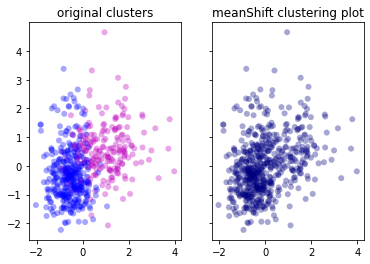

In [24]:
# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="none", alpha=0.35)
ax1.set_title("original clusters")

ax2.scatter(X[:,0], X[:,1], c=ms_pred, cmap="jet", edgecolor="none", alpha=0.35)
ax2.set_title("meanShift clustering plot")

In [25]:
ms_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Observing the above, i can see that this technique may not be ideal for my operations as it has just 0's and no 1's ie, no clusters at all, i will check its precision to see**

In [26]:
data['mean_shiftpred'] =  ms_pred
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnonis,Clusters,Aggl_pred,mean_shiftpred
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,0,1,0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,0,1,0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,0,1,0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0,1,0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,0,1,0


In [27]:
print(confusion_matrix(data['mean_shiftpred'],ms.labels_))
print(classification_report(data['mean_shiftpred'],ms.labels_))

[[569]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       569

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



**So from the above, we can see that this technique is not at all accurate** **So far, we have the k-means and agglomerative clustering to have been great for the prediction of the Benign and Malignant cancer cells, Now i would go ahead to Perform Classifcation but before that ia would carry out size reduction then use the output data for my classification Analysis**

# DIMENSIONALITY REDUCTION- PCA:

the main purpose of principal component analysis is to:

identify the  hidden patterns in a data set,
reduce the dimensionnality of the data by removing the noise and redundancy in the data,
identify correlated variables. 

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data[['radius_mean','texture_mean','perimeter_mean','area_mean','compactness_mean']])
principaldf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [29]:
kmeanspca = KMeans(n_clusters =2)
kmeanspca_pred = kmeanspca.fit_predict(principaldf[['principal component 1','principal component 2']])

In [30]:
data['kmeanspca_pred'] = kmeanspca_pred
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnonis,Clusters,Aggl_pred,mean_shiftpred,kmeanspca_pred
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,1,0,1,0,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,1,0,1,0,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,1,0,1,0,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,1,0,1,0,0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,1,0,1,0,1


In [31]:

print(confusion_matrix(data['Clusters'],data['kmeanspca_pred']))
print(classification_report(data['Clusters'],data['kmeanspca_pred']))

[[ 90 122]
 [355   2]]
              precision    recall  f1-score   support

           0       0.20      0.42      0.27       212
           1       0.02      0.01      0.01       357

    accuracy                           0.16       569
   macro avg       0.11      0.22      0.14       569
weighted avg       0.09      0.16      0.11       569



**Finally, i will carry out Classification technique using the data derived from PCA operation**


# BINARY CLASSIFICATION: 

In [32]:
#Create Testing set of data then apply logistic regression in order to obtain the highest possible accuracy.

from sklearn.model_selection import train_test_split
features_pca = ['principal component 1', 'principal component 2']
x = principaldf[features_pca]
y = data['Clusters']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.65,test_size=0.35, random_state=0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print('Accuracy_training : {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy_test : {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy_training : 0.87
Accuracy_test : 0.89


# CONCLUSION: 
**First i carried out different clustering techniques on this dataset to predict the Benign and Malignant cancer cells and i saw that The techniques with the best precision and accuracy were k-means & Hierarchical Agglomerative clustering while Meanshift clustering technique did not have a good accuracy at all** 

**I went on to carry out a dimensionality reduction technique whose data i passed in to carry out Binary classification. I carried out Logistic Regression to get the Highest possible accuracy and from the above we can see that the prediction that was made is has an overall good accuracy.**

**Now, if this were to be a real life situation, the hospital handliing these cancer cases would be able to know which cancer cell is more harmful and which one is not and this would help the doctors pay more attention to the harmful ones with more priority**